# №14. Модели VGG 

## 1. Краткая теория о VGG

1. https://debuggercafe.com/implementing-vgg11-from-scratch-using-pytorch
2. ...

***Устройство модели VGG11***
<table>
  <tr>
    <th>Схема слоев модели</th>
    <th>Блочная диаграмма</th>
  </tr>
  <tr>
    <td><img src="data/my_images/vgg11_schema_1.png" width="650"></td>
    <td><img src="data/my_images/vgg11_schema_2.png" width="250"></td>
  </tr>
</table>

## 2. Собственная реализация VGG11

In [8]:
import torch 
import torch.nn as nn

from torchvision.transforms import v2

from PIL import Image

In [12]:
# the VGG11 architecture
class VGG11(nn.Module):
    def __init__(self, in_channels, num_classes=1000, dropout=0.5):
        super(VGG11, self).__init__()
        self.in_channels = in_channels
        self.num_classes = num_classes
        # convolutional layers 
        self.conv_layers = nn.Sequential(
            nn.Conv2d(self.in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # fully connected linear layers
        self.flatten = nn.Flatten()
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=512*7*7, out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=dropout),
            nn.Linear(in_features=4096, out_features=self.num_classes)
        )
    def forward(self, x):
        x = self.conv_layers(x)
        # flatten to prepare for the fully connected layers
        x = self.flatten(x)
        x = self.linear_layers(x)
        return x

In [13]:
model = VGG11(in_channels=3, num_classes=10)
model

VGG11(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fal

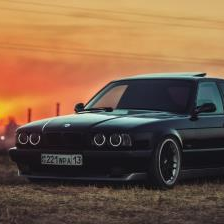

In [27]:
img_path = 'data/my_images/my_love_398x224.jpg'
img = Image.open(img_path).convert('RGB')

# Обрезка/масштабирование до 224x224
transform = v2.Compose([
    v2.CenterCrop(224),
])

img_cropped = transform(img)
img_cropped

In [28]:
# Для передачи в VGG11 переводим изображение в тензор
preprocess = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32)
])

input_tensor = preprocess(img_cropped).unsqueeze(0)  # добавляем batch dim

model.eval() # не забываем про режи работы
output = model(input_tensor)

print(output)

tensor([[ 0.0040,  0.0182, -0.0296,  0.0170, -0.0091, -0.0038, -0.0118, -0.0081,
         -0.0283, -0.0199]], grad_fn=<AddmmBackward0>)


## 3. VGG в `torchvision`

In [92]:
import torchvision
from torchvision import models
import torchvision.transforms as v1
from torchvision.transforms import v2

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### 3.1 Импорт моделей

In [29]:
vgg11 = models.vgg11(weights='DEFAULT') # weights='DEFAULT' => загрузка весов обученной модели
# vgg13 = models.vgg13()

Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to C:\Users\trxxnk/.cache\torch\hub\checkpoints\vgg11-8a719046.pth


100%|██████████| 507M/507M [00:49<00:00, 10.7MB/s] 


In [30]:
vgg11

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [46]:
inp = torch.rand([1, 3, 224, 224], dtype=torch.float32)
pred = vgg11(inp)
pred.shape

torch.Size([1, 1000])

### 3.2 Веса обученных моделей

In [ ]:
weights_vgg19 = models.VGG19_Weights.DEFAULT # или .IMAGENET1K_V1
weights_vgg19

VGG19_Weights.IMAGENET1K_V1

In [48]:
vgg19 = models.vgg19(weights=weights_vgg19)
vgg19

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\trxxnk/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth


100%|██████████| 548M/548M [01:08<00:00, 8.43MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
weights_vgg19.url # ссылка обученных весов модели

'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth'

In [50]:
transform_default = weights_vgg19.transforms()
transform_default

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [52]:
weights_vgg19.meta.keys()

dict_keys(['min_size', 'categories', 'recipe', '_docs', 'num_params', '_metrics', '_ops', '_file_size'])

In [53]:
weights_vgg19.meta['_metrics']

{'ImageNet-1K': {'acc@1': 72.376, 'acc@5': 90.876}}

In [54]:
class_names = weights_vgg19.meta['categories']
class_names[:5], len(class_names)

(['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead'], 1000)

In [87]:
# Преобразования изображений на основе модуля V1.
size = 224

transform_v1 = v1.Compose([
    v1.Resize(256),
    v1.CenterCrop(size),
    v1.ToTensor(),
    v1.Normalize(mean=(0.485, 0.5, 0.3), std=(0.23, 0.87, 0.87)) # mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
])

transform_v1

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=(0.485, 0.5, 0.3), std=(0.23, 0.87, 0.87))
)

In [88]:
# Преобразования изображений на основе модуля V2.
size = 224

transform_v2 = v2.Compose([
    v2.ToImage(),
    v2.Resize(256),
    v2.CenterCrop(size),
    v2.ToDtype(dtype=torch.float32, scale=True),
    v2.Normalize(mean=(0.2, 0.1, 0.406), std=(0.6, 0.8, 0.45)) # mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)
])

transform_v2

Compose(
      ToImage()
      Resize(size=[256], interpolation=InterpolationMode.BILINEAR, antialias=True)
      CenterCrop(size=(224, 224))
      ToDtype(scale=True)
      Normalize(mean=[0.2, 0.1, 0.406], std=[0.6, 0.8, 0.45], inplace=False)
)

### 3.3 Тестирование модели

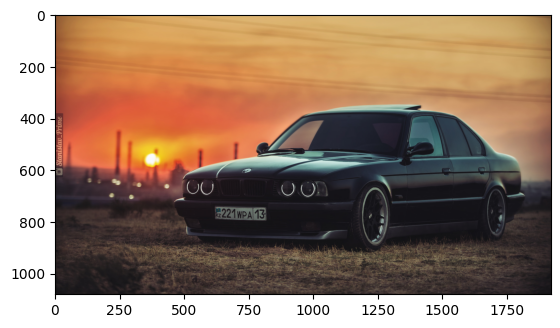

In [60]:
img = Image.open('data/my_images/my_love.jpg')
plt.imshow(img)

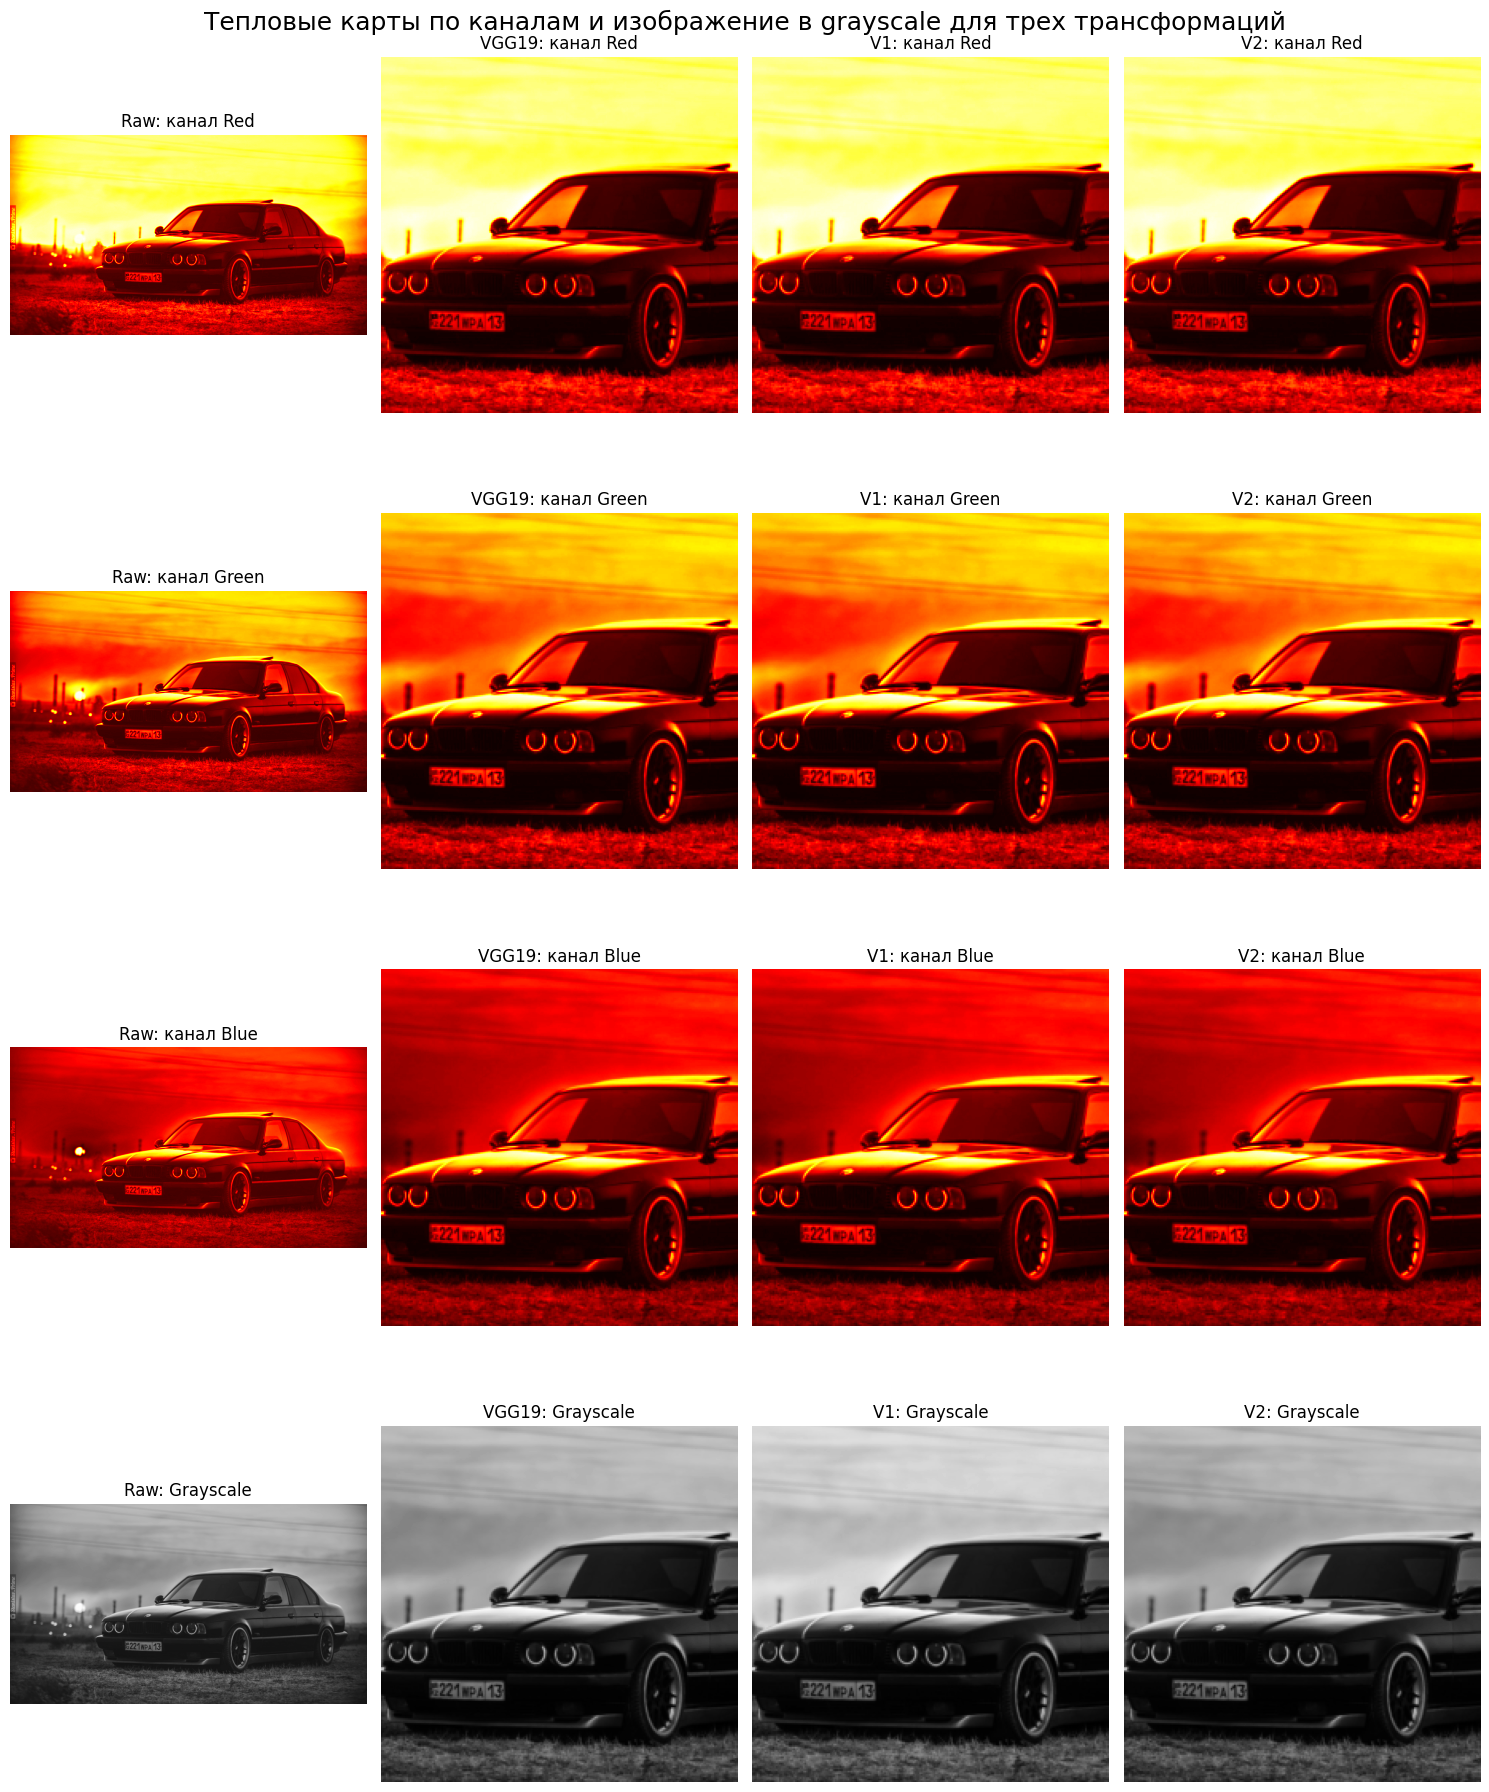

In [ ]:
# Список трансформаций
transforms = [
    ("Raw", lambda x: x),
    ("VGG19", lambda x: transform_default(x)),
    ("V1", lambda x: transform_v1(x)),
    ("V2", lambda x: transform_v2(x))
]

# Для корректной работы приведем изображение к RGB и размеру 224x224
img_resized = img

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 5 * 4))
fig.suptitle("Тепловые карты по каналам и изображение в grayscale для трех трансформаций", fontsize=18, y=0.93)

for col, (name, tfm) in enumerate(transforms):
    if name == "Raw":
        # Для raw: img_resized (PIL Image), массив [H, W, C], значения 0-255
        img_array = np.array(img_resized) / 255.0  # [H,W,C], float 0-1
        # Для тепловых карт будет shape [224,224,C]
    else:
        t_img = tfm(img_resized) # Тензор
        if isinstance(t_img, torch.Tensor):
            # v1 и v2 оба в [C,H,W], но возможны разные типы/диапазоны
            arr = t_img.detach().cpu().numpy()
            # Для v1: [0,1] диапазон, для v2: [0,1] тоже (scale=True)
            if arr.shape[0] == 1:
                arr = np.repeat(arr, 3, axis=0)
            img_array = np.transpose(arr, (1,2,0)) # -> [H,W,C]
        else:
            # Если вдруг не тензор
            img_array = np.array(t_img)
            if img_array.shape[2] != 3:
                img_array = np.repeat(img_array, 3, axis=2)
            img_array = img_array / 255.0

    # Для каждого канала строим тепловую карту
    channel_names = ['Red','Green','Blue']
    for i in range(3):
        axes[i, col].imshow(img_array[:,:,i], cmap='hot')
        axes[i, col].set_title(f"{name}: канал {channel_names[i]}", fontsize=12)
        axes[i, col].axis('off')
    # Для grayscale (изображение в оттенках серого)
    if img_array.max() > 1.0:
        img_array = img_array / 255.0
    # стандартное преобразование RGB -> Gray
    gray_img = np.dot(img_array[...,:3], [0.2989, 0.5870, 0.1140])
    axes[3, col].imshow(gray_img, cmap='gray')
    axes[3, col].set_title(f"{name}: Grayscale", fontsize=12)
    axes[3, col].axis('off')

plt.tight_layout(rect=[0,0,1,0.97])
plt.show()


In [90]:
torch.abs(transform_default(img) - transform_v2(img)).sum() # суммарное отличие транформаций

tensor(106981.8750)

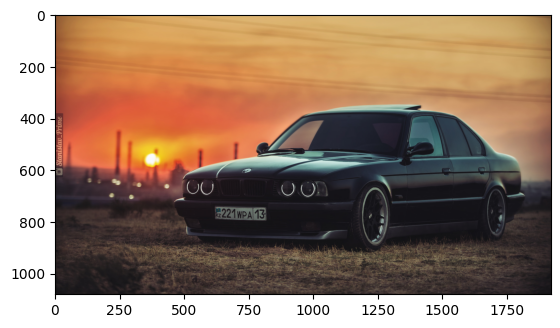

transform_default:
    sports car => 0.68733
    convertible => 0.16885
    racer => 0.05844
    car wheel => 0.04150
    beach wagon => 0.02064
    grille => 0.01467

transform_v1:
    racer => 0.73995
    sports car => 0.20759
    pickup => 0.01506
    convertible => 0.01005
    car wheel => 0.00923
    beach wagon => 0.00409

transform_v2:
    sports car => 0.48730
    racer => 0.44662
    convertible => 0.02760
    car wheel => 0.01205
    pickup => 0.01174
    beach wagon => 0.00768



In [91]:
transforms = {
    "transform_default": transform_default,
    "transform_v1": transform_v1,
    "transform_v2": transform_v2
}

plt.imshow(img)
plt.show()

vgg19.eval() # НЕ ЗАБЫВАТЬ ПЕРЕКЛЮЧАТЬ РЕЖИМ РАБОТЫ МОДЕЛИ!
for name, transform in transforms.items():
    print(f"{name}:")
    img_in = transform(img).unsqueeze(dim=0)    # img => transform => (3, 224, 224) => unsqueeze => (1, 3, 224, 224) => img_in
    pred = vgg19(img_in).squeeze()    # (1, 1000) => (1000)

    sorted, indices = pred.softmax(dim=0).sort(descending=True)
    for i, (s, ind) in enumerate(zip(sorted, indices)):
        print(f"    {class_names[ind]} => {s:.5f}")
        if i == 5:
            break
    print("================", end='\n\n')